<a href="https://colab.research.google.com/github/momivand-ai/Data-set-preprocessing/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import library

In [ ]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importing CSV file data and reviewing the data

In [ ]:

# لینک مستقیم دانلود
url = 'https://drive.google.com/uc?export=download&id=1B_MFs8uPtlZTbmpSs3Ui89UqAszLPiwV'

# دانلود فایل
gdown.download(url, 'loans.csv', quiet=False)

# خواندن فایل با pandas
df = pd.read_csv('loans.csv')
df.head()


Downloading...
From: https://drive.google.com/uc?export=download&id=1B_MFs8uPtlZTbmpSs3Ui89UqAszLPiwV
To: /content/loans.csv
100%|██████████| 22.6k/22.6k [00:00<00:00, 31.2MB/s]


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,4/16/2002,12/20/2003,2.15
1,46109,credit,9794,0,10984,10/21/2003,7/17/2005,1.25
2,46109,home,12734,1,10990,2/1/2006,7/5/2007,0.68
3,46109,cash,12518,1,10596,12/8/2010,5/5/2013,1.24
4,46109,credit,14049,1,11415,7/7/2010,5/21/2012,3.13


In [ ]:
df.head()                                                                        # نمایش 5 سطر اول
df.tail()                                                                        #نمایش 5 سطر آخر جدول
df.sample(10)                                                                    #نمایش 10 سطر تصادفی از جدول

df.shape                                                                         #ابعاد جدول
df.columns                                                                       #نام سطونها
df.dtypes                                                                        # نوع داده ها

numeric_cols=['loan_amount','rate']
df[numeric_cols].describe()                                                      # خلاصه آماری از داده ها

,loan_amount,rate
count,443.000000,443.000000
mean,7982.311512,3.217156
std,4172.891992,2.397168
min,559.000000,0.010000
25%,4232.500000,1.220000
50%,8320.000000,2.780000
75%,11739.000000,4.750000
max,14971.000000,12.620000


# Detecting and processing missing values

In [ ]:
df.info()                                                                        #اطلاعات دیتا تایپ و مقادیر گم شده
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    int64  
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         443 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 27.8+ KB


,0
client_id,0
loan_type,0
loan_amount,0
repaid,0
loan_id,0
loan_start,0
loan_end,0
rate,0


# Convert variables

In [ ]:

df['loan_type'] = df['loan_type'].astype('category')                             # تبدیل نوع وام به category
df.dtypes

,0
client_id,int64
loan_type,category
loan_amount,int64
repaid,int64
loan_id,int64
loan_start,datetime64[ns]
loan_end,datetime64[ns]
rate,float64
loan_amount_winsorized,int64
rate_clean,float64


# Identifying and processing outliers

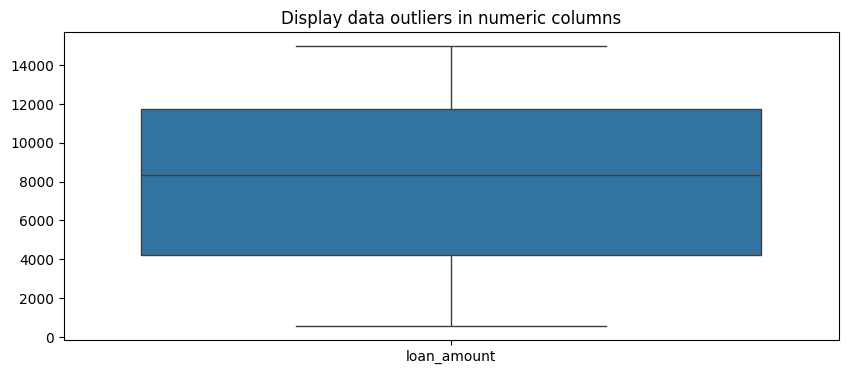

In [ ]:
plt.figure(figsize=(10, 4))                                                      # رسم باکس‌پلات برای شناسایی پرت‌ها
sns.boxplot(data=df[['loan_amount']])
plt.title('Display data outliers in numeric columns')
plt.show()


df['loan_amount_winsorized'] = mstats.winsorize(df['loan_amount'], limits=[0.05, 0.05]) # جایگزینی پرت‌ها با مقادیر 5% و 95%

#===============================================================================

Q1 = df['rate'].quantile(0.25)                                                   # ('rate')محاسبه IQR
Q3 = df['rate'].quantile(0.75)
IQR = Q3 - Q1

median_rate = df['rate'].median()# جایگزینی با میانه

df['rate_clean'] = np.where(
    (df['rate'] < (Q1 - 1.5 * IQR)) | (df['rate'] > (Q3 + 1.5 * IQR)),
    median_rate,
    df['rate'])

# Create new variables

In [ ]:
df['loan_duration_months'] = (df['loan_end'] - df['loan_start']).dt.days // 30   # محاسبه مدت وام به ماه


df['monthly_repayment'] = df['loan_amount'] / df['loan_duration_months']         # محاسبه میزان بازپرداخت ماهانه


df[['loan_duration_months', 'monthly_repayment']].head()

df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_amount_winsorized,rate_clean,loan_duration_months,monthly_repayment
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,13672,2.15,20,683.600000
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,9794,1.25,21,466.380952
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,12734,0.68,17,749.058824
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,12518,1.24,29,431.655172
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,14049,3.13,22,638.590909


# Data Cleaning

In [ ]:


df_cleaning=df.drop(columns=["client_id","loan_type","loan_id","rate_clean","loan_start","loan_end"])

df_cleaning.dtypes

,0
loan_amount,int64
repaid,int64
rate,float64
loan_amount_winsorized,int64
loan_duration_months,int64
monthly_repayment,float64


# Scaling of numerical data

In [ ]:
numeric_cols = ['loan_amount', 'rate', 'loan_duration_months', 'monthly_repayment']  # انتخاب ستون‌های عددی برای استانداردسازی
scaler = StandardScaler()
df_cleaning[numeric_cols] = scaler.fit_transform(df_cleaning[numeric_cols])


print("\nNumerical data after standardization:")                                 # نمایش داده‌های استاندارد شده
df_cleaning[numeric_cols].describe()


Numerical data after standardization:


,loan_amount,rate,loan_duration_months,monthly_repayment
count,4.430000e+02,4.430000e+02,4.430000e+02,4.430000e+02
mean,-4.410818e-17,1.082655e-16,-1.042557e-16,2.806884e-17
std,1.001131e+00,1.001131e+00,1.001131e+00,1.001131e+00
min,-1.780948e+00,-1.339406e+00,-1.839456e+00,-1.648240e+00
25%,-8.996281e-01,-8.340734e-01,-7.700611e-01,-8.338679e-01
50%,8.101582e-02,-1.825696e-01,8.545505e-02,-5.659845e-02
75%,9.012780e-01,6.401627e-01,7.270921e-01,6.955290e-01
max,1.676676e+00,3.926916e+00,1.796487e+00,2.692877e+00


# Split data into training and testing

In [ ]:

X = df_encoded.drop(['repaid', 'client_id', 'loan_id', 'loan_start', 'loan_end'], axis=1)
y = df_encoded['repaid']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # تقسیم داده‌ها (۸۰% آموزش، ۲۰% آزمون)
print(f"\nNumber of training rows: {X_train.shape[0]}")
print(f"Number of test rows: {X_test.shape[0]}")


Number of training rows: 354
Number of test rows: 89
